## Import

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
from itertools import chain

# for reading and displaying images
# from skimage.io import imread
import matplotlib.pyplot as plt
from glob import glob

# for creating validation set
from sklearn.model_selection import train_test_split

# PyTorch libraries and modules
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.optim import *
import torch.optim as optim
from torchsummary import summary
from tensorboardX import SummaryWriter

## Dataloader
for kFold, it will be run again on the run

In [2]:
from src.dataloader import *

train_dset = MyDataset(task_type='age')
test_dset = MyDataset(task_type='age', test=True)

train_loader = DataLoader(train_dset, batch_size=8)
test_loader = DataLoader(test_dset, batch_size=8)

## Load Model

In [3]:
model = 'inception'
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f'Model {model.capitalize()} is selected.')


if model == 'resnet':
    from src.architectures.resnet import *

    opt = Option()
    model = generate_model(model_depth=opt.model_depth,
                                n_classes=opt.n_classes,
                                n_input_channels=opt.n_input_channels,
                                shortcut_type=opt.shortcut_type,
                                conv1_t_size=opt.conv1_t_size,
                                conv1_t_stride=opt.conv1_t_stride,
                                no_max_pool=opt.no_max_pool,
                                widen_factor=opt.resnet_widen_factor)
    
    
elif model == 'levakov':
    
    from src.architectures.levakov_96 import *
    model = Levakov(task_type='age')
    
    
elif model == 'inception':
    
    from src.architectures.inception import *
    model = Inception3()
    
elif model == 'dinsdale':
    
    from src.architectures.dinsdale import *
    model = Dinsdale(1, 1)

else: pass

model.to(device)

Model Inception is selected.


Inception3(
  (Conv3d_1a_3x3x3): BasicConv3d(
    (conv): Conv3d(1, 8, kernel_size=(3, 3, 3), stride=(2, 2, 2), bias=False)
    (bn): BatchNorm3d(8, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv3d_2a_3x3x3): BasicConv3d(
    (conv): Conv3d(8, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), bias=False)
    (bn): BatchNorm3d(16, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv3d_2b_3x3x3): BasicConv3d(
    (conv): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
    (bn): BatchNorm3d(16, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool3d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv3d_3b_1x1x1): BasicConv3d(
    (conv): Conv3d(16, 32, kernel_size=(1, 1, 1), stride=(1, 1, 1), bias=False)
    (bn): BatchNorm3d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv3d_4a_3x3x3): BasicConv3d(
    (conv): Conv3d

## Setups

Default Settings

In [4]:
task_type = 'age' # no longer used.
resize = True
scheduler = False
epochs = range(100)
folds = range(10)

Loss & Optimizer

In [5]:
from src.losses import RMSELoss

loss_fn = nn.MSELoss()
lamb = False
optimizer = optim.Adam(model.parameters(), lr=1e-4)

Metrics

In [6]:
rmse_fn = RMSELoss()
mae_fn = nn.L1Loss()

## Run

### kFold Run

FOLD 0 - EPOCHS 0
MSE  :: [TRAIN] 380.168 | [VALID] 194.662
MAE  :: [TRAIN] 15.840   | [VALID] 11.410
RMSE :: [TRAIN] 18.678  | [VALID] 13.590
CORR :: [TRAIN] 0.419 | [VALID] 0.721
FOLD 0 - EPOCHS 5
MSE  :: [TRAIN] 101.437 | [VALID] 197.496
MAE  :: [TRAIN] 8.023   | [VALID] 10.908
RMSE :: [TRAIN] 9.700  | [VALID] 13.259
CORR :: [TRAIN] 0.808 | [VALID] 0.761


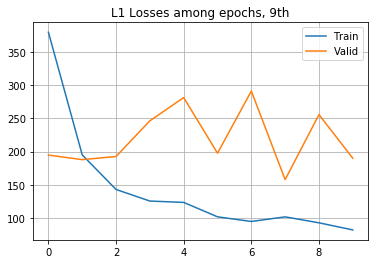

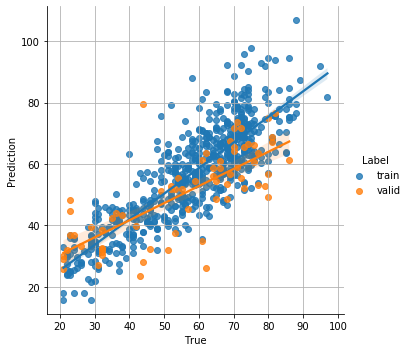

FOLD 0 - EPOCHS 10
MSE  :: [TRAIN] 76.200 | [VALID] 182.327
MAE  :: [TRAIN] 6.951   | [VALID] 10.640
RMSE :: [TRAIN] 8.467  | [VALID] 12.892
CORR :: [TRAIN] 0.858 | [VALID] 0.725
FOLD 0 - EPOCHS 15
MSE  :: [TRAIN] 65.245 | [VALID] 170.244
MAE  :: [TRAIN] 6.277   | [VALID] 10.428
RMSE :: [TRAIN] 7.760  | [VALID] 12.451
CORR :: [TRAIN] 0.883 | [VALID] 0.760


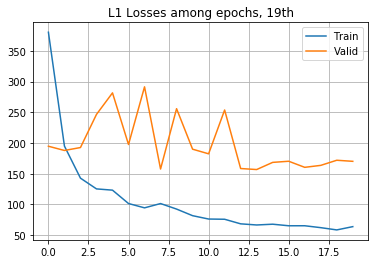

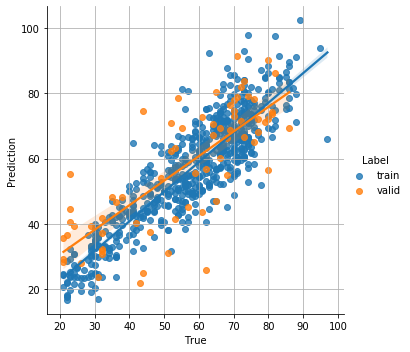

FOLD 0 - EPOCHS 20
MSE  :: [TRAIN] 55.838 | [VALID] 199.426
MAE  :: [TRAIN] 5.831   | [VALID] 11.193
RMSE :: [TRAIN] 7.200  | [VALID] 13.541
CORR :: [TRAIN] 0.897 | [VALID] 0.768
FOLD 0 - EPOCHS 25
MSE  :: [TRAIN] 50.411 | [VALID] 164.591
MAE  :: [TRAIN] 5.439   | [VALID] 10.295
RMSE :: [TRAIN] 6.775  | [VALID] 12.362
CORR :: [TRAIN] 0.909 | [VALID] 0.751


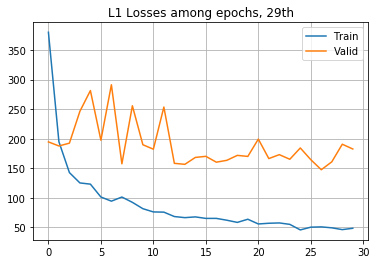

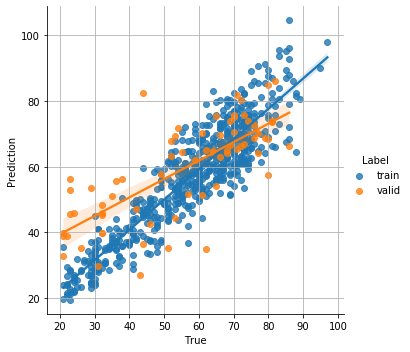

FOLD 0 - EPOCHS 30
MSE  :: [TRAIN] 51.727 | [VALID] 154.363
MAE  :: [TRAIN] 5.635   | [VALID] 9.633
RMSE :: [TRAIN] 6.970  | [VALID] 11.737
CORR :: [TRAIN] 0.906 | [VALID] 0.778
FOLD 0 - EPOCHS 35
MSE  :: [TRAIN] 45.230 | [VALID] 136.011
MAE  :: [TRAIN] 5.252   | [VALID] 9.151
RMSE :: [TRAIN] 6.436  | [VALID] 11.009
CORR :: [TRAIN] 0.917 | [VALID] 0.802


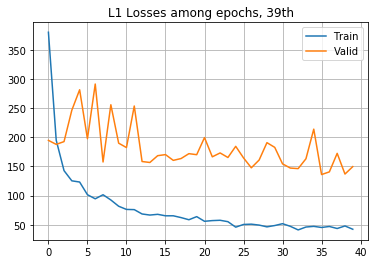

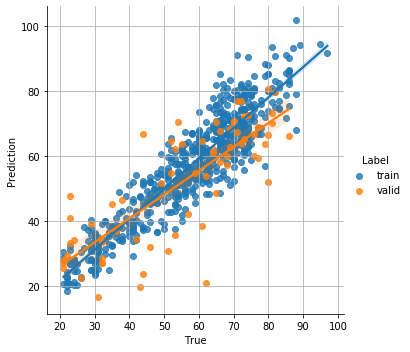

FOLD 0 - EPOCHS 40
MSE  :: [TRAIN] 50.318 | [VALID] 138.323
MAE  :: [TRAIN] 5.592   | [VALID] 9.466
RMSE :: [TRAIN] 6.853  | [VALID] 11.092
CORR :: [TRAIN] 0.909 | [VALID] 0.804
FOLD 0 - EPOCHS 45
MSE  :: [TRAIN] 43.588 | [VALID] 164.202
MAE  :: [TRAIN] 5.085   | [VALID] 10.186
RMSE :: [TRAIN] 6.360  | [VALID] 12.327
CORR :: [TRAIN] 0.921 | [VALID] 0.753


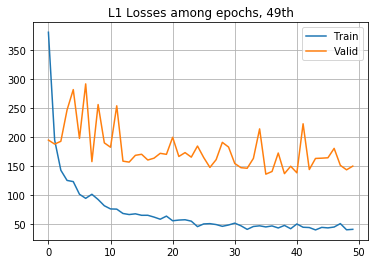

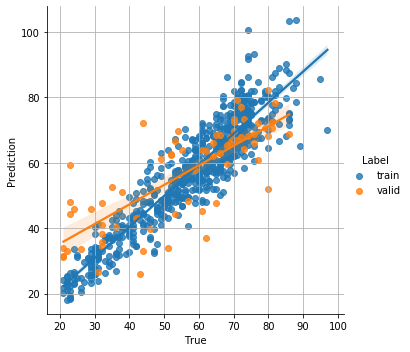

FOLD 0 - EPOCHS 50
MSE  :: [TRAIN] 39.418 | [VALID] 150.808
MAE  :: [TRAIN] 4.825   | [VALID] 9.630
RMSE :: [TRAIN] 6.025  | [VALID] 11.723
CORR :: [TRAIN] 0.928 | [VALID] 0.784
FOLD 0 - EPOCHS 55
MSE  :: [TRAIN] 39.490 | [VALID] 138.986
MAE  :: [TRAIN] 4.958   | [VALID] 9.195
RMSE :: [TRAIN] 6.002  | [VALID] 11.257
CORR :: [TRAIN] 0.929 | [VALID] 0.802


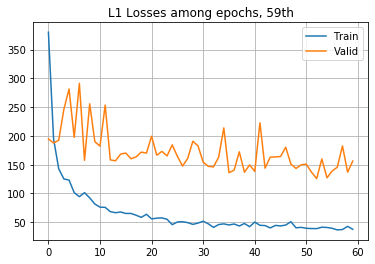

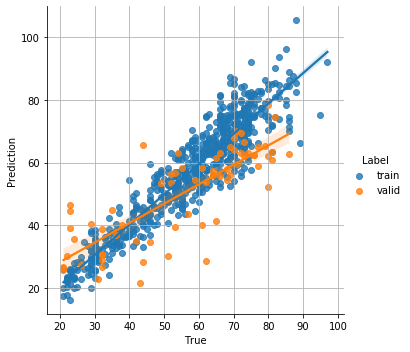

FOLD 0 - EPOCHS 60
MSE  :: [TRAIN] 37.206 | [VALID] 154.863
MAE  :: [TRAIN] 4.792   | [VALID] 10.039
RMSE :: [TRAIN] 5.921  | [VALID] 11.986
CORR :: [TRAIN] 0.932 | [VALID] 0.792
FOLD 0 - EPOCHS 65
MSE  :: [TRAIN] 42.572 | [VALID] 134.597
MAE  :: [TRAIN] 4.994   | [VALID] 9.268
RMSE :: [TRAIN] 6.224  | [VALID] 11.106
CORR :: [TRAIN] 0.925 | [VALID] 0.804


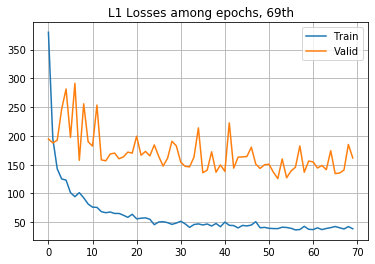

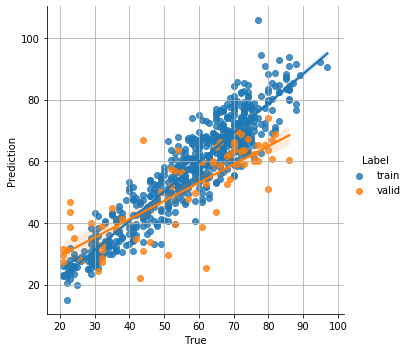

FOLD 0 - EPOCHS 70
MSE  :: [TRAIN] 39.647 | [VALID] 134.346
MAE  :: [TRAIN] 4.923   | [VALID] 9.225
RMSE :: [TRAIN] 6.115  | [VALID] 11.143
CORR :: [TRAIN] 0.929 | [VALID] 0.809
FOLD 0 - EPOCHS 75
MSE  :: [TRAIN] 37.857 | [VALID] 143.669
MAE  :: [TRAIN] 4.797   | [VALID] 9.656
RMSE :: [TRAIN] 5.982  | [VALID] 11.526
CORR :: [TRAIN] 0.932 | [VALID] 0.797


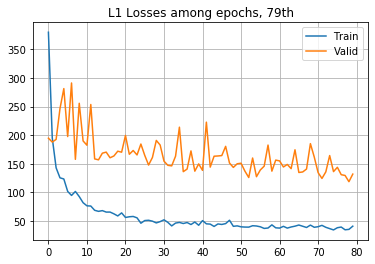

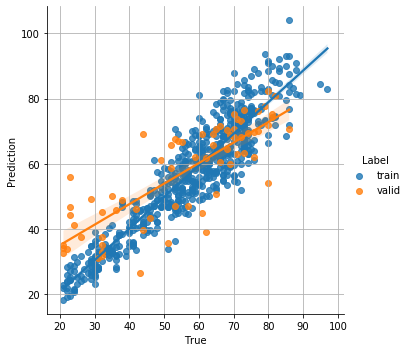

FOLD 0 - EPOCHS 80
MSE  :: [TRAIN] 34.787 | [VALID] 152.170
MAE  :: [TRAIN] 4.566   | [VALID] 10.072
RMSE :: [TRAIN] 5.681  | [VALID] 11.701
CORR :: [TRAIN] 0.936 | [VALID] 0.804
FOLD 0 - EPOCHS 85
MSE  :: [TRAIN] 33.179 | [VALID] 134.898
MAE  :: [TRAIN] 4.497   | [VALID] 9.279
RMSE :: [TRAIN] 5.526  | [VALID] 11.072
CORR :: [TRAIN] 0.939 | [VALID] 0.812


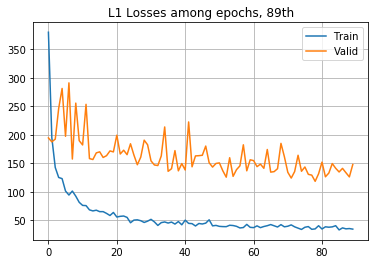

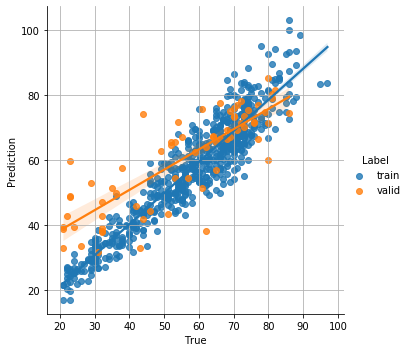

FOLD 0 - EPOCHS 90
MSE  :: [TRAIN] 31.636 | [VALID] 127.430
MAE  :: [TRAIN] 4.331   | [VALID] 8.861
RMSE :: [TRAIN] 5.424  | [VALID] 10.773
CORR :: [TRAIN] 0.943 | [VALID] 0.817


In [ ]:
best_loss = 10

trn_fold_losses, tst_fold_losses = [], []
trn_fold_corrs, tst_fold_corrs = [], []

trn_fold = {
    'MSE': list(),
    'MAE': list(),
    'RMSE': list(),
    'Correlation': list()
}

val_fold = {
    'MSE': list(),
    'MAE': list(),
    'RMSE': list(),
    'Correlation': list()
}

tst_losses, tst_maes, tst_rmses = [], [], []
for fold in folds:
    
    train_dset = MyDataset(task_type='age', fold=fold)
    valid_dset = MyDataset(task_type='age', test=True, fold=fold)

    train_loader = DataLoader(train_dset, batch_size=8)
    valid_loader = DataLoader(valid_dset, batch_size=8)
    
    trn_losses, val_losses = [], []
    trn_maes, val_maes = [], []
    trn_rmses, val_rmses = [], []
    
    for e in epochs:

        model, (trn_losses, trn_maes, trn_rmses), trn_preds = train(model, train_loader, resize, device,
                                                              loss_fn, mae_fn, rmse_fn,
                                                              trn_losses, trn_maes, trn_rmses,
                                                              optimizer, scheduler, lamb)
        
        model, (val_losses, val_maes, val_rmses), val_preds =  eval(model, valid_loader, resize, device,
                                                              loss_fn, mae_fn, rmse_fn,
                                                              val_losses, val_maes, val_rmses)


        # SUM UP RESLUTS
        trn_df = make_df(trn_preds)
        val_df = make_df(val_preds)
        reg_df = pd.concat([trn_df, val_df], ignore_index=True)

        trn_corr = reg_df[reg_df['Label'] == 'train'].corr().Prediction['True']
        val_corr = reg_df[reg_df['Label'] == 'valid'].corr().Prediction['True']

        if e % 5 == 0:
            print(f'FOLD {fold} - EPOCHS {e}')
            print(f'MSE  :: [TRAIN] {trn_losses[-1]:.3f} | [VALID] {val_losses[-1]:.3f}')
            print(f'MAE  :: [TRAIN] {trn_maes[-1]:.3f}   | [VALID] {val_maes[-1]:.3f}')
            print(f'RMSE :: [TRAIN] {trn_rmses[-1]:.3f}  | [VALID] {val_rmses[-1]:.3f}')
            print(f'CORR :: [TRAIN] {trn_corr:.3f} | [VALID] {val_corr:.3f}')

        if e % 10 == 9:
            plt.title(f"L1 Losses among epochs, {e}th")
            plt.plot(trn_losses, label='Train')
            plt.plot(val_losses, label='Valid')
            plt.grid(); plt.legend()
            
            sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
            plt.grid()
            plt.show()
    
    trn_fold['MSE'].append(trn_losses)
    trn_fold['MAE'].append(trn_maes)
    trn_fold['RMSE'].append(trn_rmses)
    trn_fold['Correlation'].append(trn_corr)
    
    val_fold['MSE'].append(val_losses)
    val_fold['MAE'].append(val_maes)
    val_fold['RMSE'].append(val_rmses)
    val_fold['Correlation'].append(val_corr)
    
    # TEST
    test_dset = MyDataset(task_type='age', test=True)
    test_loader = DataLoader(test_dset, batch_size=8)
    
    model, (tst_losses, tst_maes, tst_rmses), tst_preds = eval(model, test_loader, resize, device,
                                                              loss_fn, mae_fn, rmse_fn,
                                                              tst_losses, tst_maes, tst_rmses)

    tst_df = nake_df(tst_preds)
    reg_df = pd.concat([reg_df, tst_df], ignore_index=True)

    tst_corr = reg_df[reg_df['Label'] == 'test'].corr().Prediction['True']
    
    print(f'FOLD {fold}', end='')
    print(f'MSE  :: [TEST] {tst_losses:.3f}')
    print(f'MAE  :: [TEST] {tst_maes[-1]:.3f}')
    print(f'RMSE :: [TEST] {tst_rmses[-1]:.3f}')
    print(f'CORR :: [TEST] {tst_corr:.3f}')

    sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
    plt.grid()
    plt.show()

In [ ]:
def make_df(data):
    
    trues, preds = data
    return pd.DataFrame({
        'True': list(map(float, trues)),
        'Prediction': list(map(float, preds)),
        'Label': ['test'] * len(trues)
    })

In [9]:
def train(model, dataloader, resize, device,
          loss_fn, mae_fn, rmse_fn,
          losses, maes, rmses,
          optimizer, scheduler, lamb):
    
    bth_loss, bth_mae, bth_rmse = 0, 0, 0
    trues, preds = [], []
    model.train()
    for i, (x, y) in enumerate(dataloader):

        if resize:
            x, y = F.interpolate(x, size=(96, 96, 96)).to(device), y.to(device)

        else:
            x, y = x.to(device), y.to(device)

        optimizer.zero_grad()

        y_pred = model.forward(x).to(device)

        trues.append(y.to('cpu'))
        preds.append(y_pred.to('cpu'))

        # Loss
        loss = loss_fn(y_pred.squeeze(1), y)
        
        if lamb:
            l2_reg = torch.tensor(0.)
            for param in model.parameters():
                l2_reg += torch.norm(param)
            loss += lamb * l2_reg
        
        # Metrics
        mae = mae_fn(y_pred.squeeze(1), y)
        rmse = rmse_fn(y_pred.squeeze(1), y)

        del x, y, y_pred

        loss.backward()
        optimizer.step()
        if scheduler: scheduler.step()

        bth_loss += loss.item()
        bth_mae  += mae.item()
        bth_rmse += rmse.item()

    torch.cuda.empty_cache()

    ### loss
    M = len(dataloader)
    losses.append(bth_loss / M)
    maes.append(bth_mae / M)
    rmses.append(bth_rmse / M)

    ### collect trues/predictions
    trues = list(chain(*trues))
    preds = list(chain(*preds))
    
    return model, (losses, maes, rmses), (trues, preds)

In [8]:
def eval(model, dataloader, resize, device,
          loss_fn, mae_fn, rmse_fn,
        losses, maes, rmses):
    
    bth_loss, bth_mae, bth_rmse = 0, 0, 0
    trues, preds = [], []
    model.eval()
    with torch.no_grad(): # to not give loads on GPU... :(
        for i, (x, y) in enumerate(dataloader):

            if resize:
                x, y = F.interpolate(x, size=(96, 96, 96)).to(device), y.to(device)

            else:
                x, y = x.to(device), y.to(device)

            optimizer.zero_grad()

            y_pred = model.forward(x).to(device)

            trues.append(y.to('cpu'))
            preds.append(y_pred.to('cpu'))

            # Loss
            loss = loss_fn(y_pred.squeeze(1), y)

            # Metrics
            mae = mae_fn(y_pred.squeeze(1), y)
            rmse = rmse_fn(y_pred.squeeze(1), y)

            del x, y, y_pred

            bth_loss += loss.item()
            bth_mae  += mae.item()
            bth_rmse += rmse.item()

    torch.cuda.empty_cache()

    ### loss
    M = len(dataloader)
    losses.append(bth_loss / M)
    maes.append(bth_mae / M)
    rmses.append(bth_rmse / M)

    ### collect trues/predictions
    trues = list(chain(*trues))
    preds = list(chain(*preds))
    
    return model, (losses, maes, rmses), (trues, preds)

In [3]:
best_loss = 10

trn_fold_losses, tst_fold_losses = [], []
trn_fold_corrs, tst_fold_corrs = [], []

trn_fold = {
    'MSE': list(),
    'MAE': list(),
    'RMSE': list(),
    'Correlation': list()
}

tst_fold = {
    'MSE': list(),
    'MAE': list(),
    'RMSE': list(),
    'Correlation': list()
}

for fold in folds:
    
    train_dset = MyDataset(task_type='age', fold=fold)
    test_dset = MyDataset(task_type='age', test=True, fold=fold)

    train_loader = DataLoader(train_dset, batch_size=8)
    test_loader = DataLoader(test_dset, batch_size=8)
    
    trn_losses, tst_losses = [], []
    trn_maes, tst_maes = [], []
    trn_rmses, tst_rmses = [], []
    for e in epochs:

        # TRAIN
        trn_bth_loss, trn_bth_mae, trn_bth_rmse = 0, 0, 0
        trn_trues, trn_preds = [], []
        model.train()
        for i, (x, y) in enumerate(train_loader):

            if resize:
                x, y = F.interpolate(x, size=(96, 96, 96)).to(device), y.to(device)

            else:
                x, y = x.to(device), y.to(device)

            optimizer.zero_grad()

            y_pred = model.forward(x).to(device)

            trn_trues.append(y.to('cpu'))
            trn_preds.append(y_pred.to('cpu'))

            # Loss
            loss = loss_fn(y_pred.squeeze(1), y)
            
            # Metrics
            mae = mae_fn(y_pred.squeeze(1), y)
            rmse = rmse_fn(y_pred.squeeze(1), y)
            
            del x, y, y_pred

            loss.backward()
            optimizer.step()
            if scheduler: scheduler.step()

            trn_bth_loss += loss.item()
            trn_bth_mae  += loss.item()
            trn_bth_rmse += loss.item()

        torch.cuda.empty_cache()

        ### loss
        trn_losses.append(trn_bth_loss / len(train_loader))
        trn_maes.append(trn_bth_mae / len(train_loader))
        trn_rmses.append(trn_bth_rmse / len(train_loader))

        ### collect trues/predictions
        trn_trues = list(chain(*trn_trues))
        trn_preds = list(chain(*trn_preds))

        
        # VALID
        tst_bth_loss, tst_bth_mae, tst_bth_rmse = 0, 0, 0
        model.eval()
        tst_trues, tst_preds = [], []
        with torch.no_grad(): # to not give loads on GPU... :(
            for i, (x, y) in enumerate(test_loader):
                if resize:
                    x, y = F.interpolate(x, size=(96, 96, 96)).to(device), y.to(device)

                else:
                    x, y = x.to(device), y.to(device)

                y_pred = model.forward(x).to(device)

                tst_trues.append(y.to('cpu'))
                tst_preds.append(y_pred.to('cpu'))

                # Loss
                loss = loss_fn(y_pred.squeeze(1), y)
                
                # Metrics
                mae = mae_fn(y_pred.squeeze(1), y)
                rmse = rmse_fn(y_pred.squeeze(1), y)
                
                del x, y, y_pred

                tst_bth_loss += loss.item()
                tst_bth_mae  += loss.item()
                tst_bth_rmse += loss.item()
                
        torch.cuda.empty_cache()
        
        ### loss
        tst_losses.append(tst_bth_loss / len(test_loader))
        tst_maes.append(tst_bth_mae / len(test_loader))
        tst_rmses.append(tst_bth_rmse / len(test_loader))

        ### collect trues/predictions
        tst_trues = list(chain(*tst_trues))
        tst_preds = list(chain(*tst_preds))

        
        # SUM UP RESLUTS
        reg_df = pd.DataFrame({
            'True': list(map(float, trn_trues + tst_trues)),
            'Prediction': list(map(float, trn_preds + tst_preds)),
            'Label': ['train'] * len(trn_trues) + ['valid'] * len(tst_trues)
        })

        trn_corr = reg_df[reg_df['Label'] == 'train'].corr().Prediction['True']
        tst_corr = reg_df[reg_df['Label'] == 'valid'].corr().Prediction['True']

        if e % 5 == 0:
            print(f'FOLD {fold} - EPOCHS {e}')
            print(f'MSE  :: [TRAIN] {trn_losses[-1]:.3f} | [VALID] {tst_losses[-1]:.3f}')
            print(f'MAE  :: [TRAIN] {trn_maes[-1]:.3f}   | [VALID] {tst_maes[-1]:.3f}')
            print(f'RMSE :: [TRAIN] {trn_rmses[-1]:.3f}  | [VALID] {tst_rmses[-1]:.3f}')
            print(f'CORR :: [TRAIN] {trn_corr:.3f} | [VALID] {tst_corr:.3f}')

        if e % 10 == 9:
            plt.title(f"L1 Losses among epochs, {e}th")
            plt.plot(trn_losses, label='Train')
            plt.plot(tst_losses, label='Valid')
            plt.grid(); plt.legend()
            
            sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
            plt.grid()
            plt.show()
    
    trn_fold['MSE'].append(trn_losses)
    trn_fold['MAE'].append(trn_maes)
    trn_fold['RMSE'].append(trn_rmses)
    trn_fold['Correlation'].append(trn_corr)
    
    tst_fold['MSE'].append(tst_losses)
    tst_fold['MAE'].append(tst_maes)
    tst_fold['RMSE'].append(tst_rmses)
    tst_fold['Correlation'].append(tst_corr)
    
    # TEST
    test_dset = MyDataset(task_type='age', test=True)
    test_loader = DataLoader(test_dset, batch_size=8)
    
    tst_bth_loss = 0
    model.eval()
    tst_trues, tst_preds = [], []
    with torch.no_grad(): # to not give loads on GPU... :(
        for i, (x, y) in enumerate(test_loader):
            if resize:
                x, y = F.interpolate(x, size=(96, 96, 96)).to(device), y.to(device)

            else:
                x, y = x.to(device), y.to(device)

            y_pred = model.forward(x).to(device)

            tst_trues.append(y.to('cpu'))
            tst_preds.append(y_pred.to('cpu'))

            loss = loss_fn(y_pred.squeeze(1), y)
            
            mae = mae_fn(y_pred.squeeze(1), y)
            rmse = rmse_fn(y_pred.squeeze(1), y)
            del x, y, y_pred

            tst_bth_loss += loss.item()

    torch.cuda.empty_cache()
    ### loss
    tst_loss = tst_bth_loss / len(test_loader)

    ### collect trues/predictions
    tst_trues = list(chain(*tst_trues))
    tst_preds = list(chain(*tst_preds))
    
    tst_df = pd.DataFrame({
        'True': list(map(float, tst_trues)),
        'Prediction': list(map(float, tst_preds)),
        'Label': ['test'] * len(tst_trues)
    })
    reg_df = pd.concat([reg_df, tst_df], ignore_index=True)

    tst_corr = reg_df[reg_df['Label'] == 'test'].corr().Prediction['True']
    print(f'FOLD {fold}', end='')
    print(f'RMSE :: [TEST] {tst_loss:.3f}')
    print(f'CORR :: [TEST] {tst_corr:.3f}')

    sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
    plt.grid()
    plt.show()

NameError: name 'folds' is not defined